# Providing data-driven suggestions for HR

## Description

This project aims to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.


### Understand the business scenario

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. As being able to predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.


The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Load libraries


### Import packages

In [2]:

# For data manipulation
import numpy as np
import pandas as pd
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
# For saving models
import pickle



## Dataset

In [4]:
df = pd.read_csv("HR_capstone_dataset.csv")

df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)



### Basic information about the data

In [3]:
# Basic information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The dataset do not present Null-values 

### Descriptive statistics about the data

In [4]:
# Descriptive statistics about the data
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Checking missing values

In [5]:
# missing values
df.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

The dataset from Kaggle is free to Null values

In [6]:
# Checking for duplicates
df.duplicated().sum()


3008

In [7]:
# Droping duplicates 
df = df.drop_duplicates(keep='first')

df.duplicated().sum()

0

The duplicated values were dropped, but the dataset loss about 20% data.

### Checking outliers

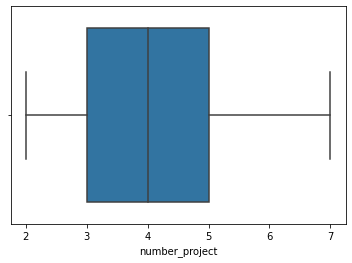

In [21]:
# boxplot to detect any outliers
sns.boxplot(df['number_project'])

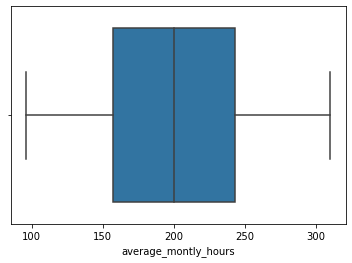

In [22]:
sns.boxplot(df['average_montly_hours'])


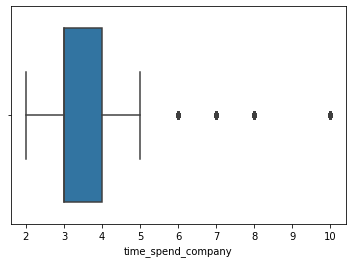

In [23]:
sns.boxplot(df['time_spend_company'])


The numeric data with outliers is the time spend in company, the others did not present any outliers.

Certain types of models are more sensitive to outliers than others. At the stage of building the model, the binomial type models deal well with outliers.

## Step 2. Data Exploration ( EDA)


In [8]:
# Numbers of people who left vs. stayed
print(df['left'].value_counts())

0    10000
1     1991
Name: left, dtype: int64


The dataset presents a lot more (5 times) negatives than positives, so this could influence the model for example a generalized linear model with a binomial response to predict the negatives better than the positives. The model will be tested but is good to keep that in mind.

### Data visualizations

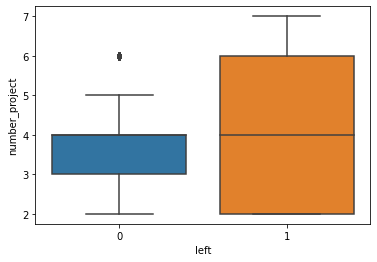

In [45]:
#number of projects as factor to leave the company

sns.boxplot( df["left"],df["number_project"])

The employees who left the company reported almost the double amount of active projects at the company comared with the ones thatstayed at the company, so it is a factor to leave. 

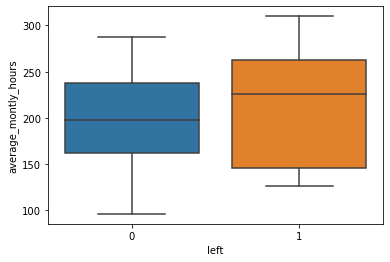

In [46]:
# average montly hours as as factor to leave the company

sns.boxplot( df["left"],df["average_montly_hours"])

Employees with more average in the montly hours are more likely to left.

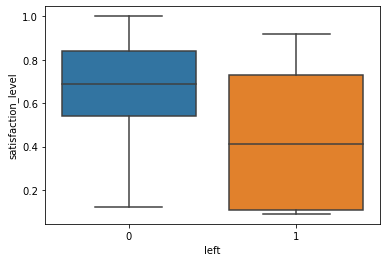

In [42]:
# satisfaction_level

sns.boxplot( df["left"],df["satisfaction_level"])

The average satisfaction for people who left the company is around 0.4, It is clear in the plot the difference compared with people who stayed at the company, It is a crucial factor.

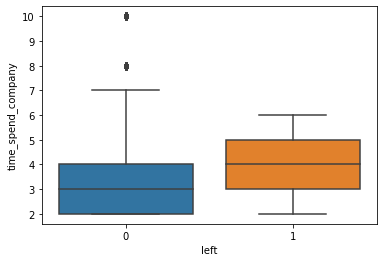

In [44]:
# time spend company
sns.boxplot( df["left"],df["time_spend_company"])

According to the boxplot employees with more time in the company are more likely to left it. 


It is not a surprise that people who used to work more hours per month and with more active projects are the ones with the less satisfied with their work, so this people are more likely to left the company even if they have more years working in that company. 

## Step 3. Model Building
- Fitting a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Modeling

Correlation matrix

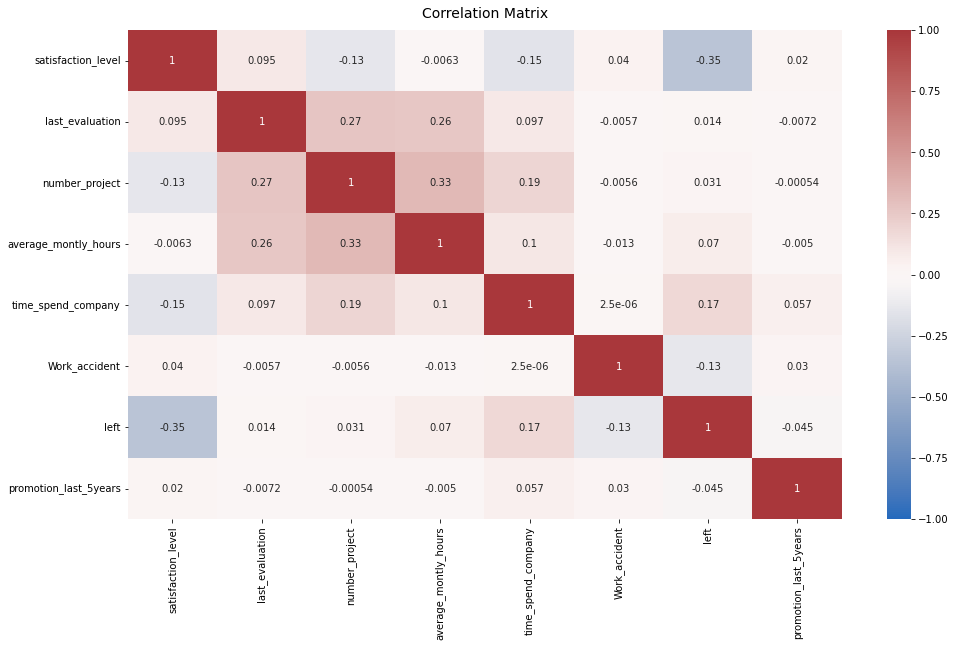

In [49]:
# Correlation matrix

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':14}, pad=12);

The correlation matrix do not show strong relationships between the variables with the left parameter, the one with the highest level is the satisfaction level and that was saw as well in the boxplot. 

Beafore modeling the data it is needed to change some type of data.

In [9]:
# `salary` column as an ordinal numeric category
df['salary'] = (df['salary'].astype('category'))

# Dummy encode the `department` column
df = pd.get_dummies(df, drop_first=False)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_montly_hours    11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   Work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   Department_IT           11991 non-null  uint8  
 9   Department_RandD        11991 non-null  uint8  
 10  Department_accounting   11991 non-null  uint8  
 11  Department_hr           11991 non-null  uint8  
 12  Department_management   11991 non-null  uint8  
 13  Department_marketing    11991 non-null  uint8  
 14  Department_product_mng  11991 non-null

In [10]:
# making a copy of the dataset
df2 = df.copy()

Obtaining the Y and X datasets

In [11]:
# response
y = df2['left']

# predictors
X = df2.drop('left', axis=1)

The datasets need to be randomly separated into trainig (75%) and test (25%) sets 

In [12]:
# test and trainig sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=42)

The binomial or logistic regression model can help with dataset as the response is binomial. 

In [13]:
#Logistic model
logmod = LogisticRegression(random_state=42, max_iter=500).fit(X_train,y_train)

With the model is needed to evaluate the prediction power or classification with the test set.

In [14]:
# model prediction
y_pred = logmod.predict(X_test)

The best way to know how good the model is, It is using the confusion matrix and the parameters such as accuracy, precision, F1 and recall.

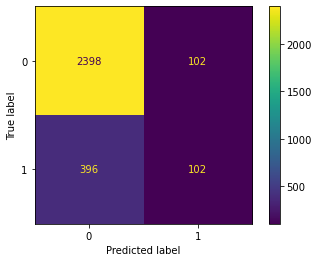

In [15]:
# Confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=logmod.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=logmod.classes_)

log_disp.plot(values_format='')
plt.show()

The model does not predict very well, as metioned earlier the dataset was imbalance, It has almost 5 times more "0" than "1" for that reason it is normal that the model predicts better a fasle value "0" than a true value "1".

In [31]:
# number of each value in the test set
print(y_test.value_counts())

0    2500
1     498
Name: left, dtype: int64


The model did not interpret the real value for each classification, as reported about 390 more values as negatives "0" and less than a half of positives values "1".

In [16]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.96      0.91      2500
    Predicted would leave       0.50      0.20      0.29       498

                 accuracy                           0.83      2998
                macro avg       0.68      0.58      0.60      2998
             weighted avg       0.80      0.83      0.80      2998



The logistic model built has precesion value of 0.86 when predicting people who stayed at the company, It is a acceptable result. But the preformance decreases 0.5, when It has to predict employees who left the comapany "1", maybe if the dataset is banlaced by taking the same amount of data for both possible responses the model could improve the preformance.

Another kind of model that can handle an imbalance dataset is a decision tree, this will be compared in this project.

In [21]:
#Decision tree
tree = DecisionTreeClassifier(random_state=0)

# Hyperparameters to search over
cv_params = cv_params = {'max_depth':[4, 6, 8, None],
'min_samples_leaf': [2, 5, 1],
'min_samples_split': [2, 4, 6]
}

# Scoring metrics to compare
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [22]:
tree1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [23]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [24]:
tree1.best_score_

0.9758952535925409

The value of 0.9758 is call AUC and it gives information about the model capacity to predict the response, this decision tree can predict about 98 % correct, It is a better result whe comparing with the logistic regression.

In [27]:
prediction = tree1.predict(X_test)

In [28]:
classification_report(prediction, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99      2525\n           1       0.93      0.97      0.95       473\n\n    accuracy                           0.98      2998\n   macro avg       0.96      0.98      0.97      2998\nweighted avg       0.98      0.98      0.98      2998\n'

The model's parameters show that is a good predictor for this data as can predictwith data the model did not know (test set). 

In [32]:
# confusion matrix
confusion_matrix(y_test, prediction, labels=tree1.classes_)

array([[2488,   12],
       [  37,  461]])

Compared with the logistic regression the decision trees interpret better the amount of values for the possible outcomes, and It is clear that the negatives positives and negatives are much less than for the regression model.

### Conclusion and Recommendations


The data for the company Salifort Motors was model using a very well known models a logistic regression and a decision tree, the project was focused to be able to predict if a employee would leave or not the company, this taking as a predictors data such as: 
+ Satisfaction level
+ Previuos evaluation of satisfaction	
+ Number of projects	
+ Average montly hours worked	
+ Time spend in the company	
+ Number work accidents	
+ Promotion in the last 5 years	
+ Department	
+ Salary range

The decision tree model improves the results for prediction for this dataset, as mentioned above it was expected that the logistic regression model failed due to the imbalance dataset, even so, the model offered about 80 % of prediction for the employees who would stay at the company. For the employees who would leave the company the regression model did not identified the correct amount of data and offers just 50 % of correct predictions. In both scenarios the decision tree can predict around 95 % of cases right.

One important thing is that the dataset by itself can give a strong idea of the preincipal reasons for an employee to leave the company, this with the help of the Data visualizations, as the boxplots a barcharts showed that the employees that left or would leave are the ones with worst conditions, so this can help a company interested in this topic without the need to construct a model for prediction just look at the visualizations can be enough.

As recomendation, It is important to consider that decision trees can overfit the data, so It would be a good practice to model a future datasets using two or more classification models to compared the power of prediction and formulate a better conclusion, for this dataset this company could use the decision tree if they want to have an idea if a employee is likely to leave based on the parameters modeled.  